[ARCH Documentation](https://media.readthedocs.org/pdf/arch/stable/arch.pdf)

In [1]:
import pandas as pd
import statsmodels as sm
from statsmodels import api as smi
from statsmodels import graphics as smg
from statsmodels import tsa as tsa 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import math
import itertools as it
from arch import arch_model
from arch.univariate import ARCH
from arch.univariate import GARCH
import datetime 

from scipy import stats

%matplotlib inline

/Users/Sam_I_Am/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
rentalDat_initial = pd.read_csv('nyc rental_details 2018-04-29.csv')
rentalDat_initial.columns = ['Date', 'RentalCount']
# 0 == Monday, 6 == Sunday
#rentalDat_initial['RentalCount'] = rentalDat_initial['RentalCount'].apply(int)
rentalDat_initial['DoW'] = pd.to_datetime(rentalDat_initial['Date']).apply(datetime.date.weekday)
rentalDat_initial['MoY'] = pd.to_datetime(rentalDat_initial['Date']).apply(lambda x: x.month)
rentalDat_initial['LogRental'] = rentalDat_initial['RentalCount'].apply(math.log)
rentalDat_initial['Lag1 LogRental'] = rentalDat_initial['LogRental'].shift()
rentalDat_initial['Diff1 LogRental'] = rentalDat_initial['LogRental'] - rentalDat_initial['Lag1 LogRental']
rentalDat_initial['Date'] = pd.to_datetime(rentalDat_initial['Date'])
rentalDat_initial.sort_values('Date', inplace=True, ascending=False)


# set cutoff for startdate below
startDate = pd.to_datetime('2014-01-01')

rentalDat = rentalDat_initial[pd.to_datetime(rentalDat_initial['Date']) >= startDate]
rentalDat.set_index('Date', drop=False, inplace=True)

rentalDat.dropna(inplace=True)
rentalDat.shape

/Users/Sam_I_Am/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(1570, 7)

In [3]:
DOWavg = pd.DataFrame(rentalDat.groupby('DoW')['LogRental'].mean())
DOWavg.columns = ['DoW avg']
MOYavg = pd.DataFrame(rentalDat.groupby('MoY')['LogRental'].mean())
MOYavg.columns = ['MoY avg']


In [4]:
# run once! 
rentalDat = rentalDat.merge(DOWavg, how='left', left_on='DoW', right_index=True)
rentalDat = rentalDat.merge(MOYavg, how='left', left_on='MoY', right_index=True)

In [5]:
rentalDat['LogRental+'] = rentalDat['LogRental'].map(lambda x: x + 20)
rentalDat['LogRental_desea'] = rentalDat['LogRental+'] - rentalDat['MoY avg'] - rentalDat['DoW avg']
#rentalDat['LogRental_desea'] = rentalDat['LogRental_desea'].map(lambda x: x*100)

In [6]:
rentalDat.sort_index(inplace=True, ascending=True)
rentalDat

,Date,RentalCount,DoW,MoY,LogRental,Lag1 LogRental,Diff1 LogRental,DoW avg,MoY avg,LogRental+,LogRental_desea
Date,,,,,,,,,,,
2014-01-01,2014-01-01,6101,2,1,8.716208,9.069122,-0.352914,10.353636,9.521517,28.716208,8.841055
2014-01-02,2014-01-02,8683,3,1,9.069122,7.055313,2.013810,10.340534,9.521517,29.069122,9.207072
2014-01-03,2014-01-03,1159,4,1,7.055313,7.741968,-0.686655,10.275226,9.521517,27.055313,7.258570
2014-01-04,2014-01-04,2303,5,1,7.741968,7.901007,-0.159039,10.035310,9.521517,27.741968,8.185141
2014-01-05,2014-01-05,2700,6,1,7.901007,9.171600,-1.270592,10.030363,9.521517,27.901007,8.349127
2014-01-06,2014-01-06,9620,0,1,9.171600,8.756997,0.414602,10.275299,9.521517,29.171600,9.374784
2014-01-07,2014-01-07,6355,1,1,8.756997,9.144735,-0.387737,10.332785,9.521517,28.756997,8.902696
2014-01-08,2014-01-08,9365,2,1,9.144735,9.513256,-0.368521,10.353636,9.521517,29.144735,9.269582
2014-01-09,2014-01-09,13538,3,1,9.513256,9.208238,0.305018,10.340534,9.521517,29.513256,9.651205


## Model Selection

In [7]:
# use function below to calculate AICc for different combinations 

def calcAICc(observations, constant):
    
    trendVal = str(constant)
    # below is for all combinations of (p,q) <= 2
    combos = list(it.product(range(8),repeat=2))
    result_li = []
    
    
    for ea in combos: 
        ARMAaiccCalc = tsa.arima_model.ARMA(observations,order=ea) 
        # trend= indicates whether to use constant('c') or not ('nc'). 
        try:
            ARMAaiccCalc = ARMAaiccCalc.fit(trend=trendVal)
            logLikeli = ARMAaiccCalc.llf
            n_obs = ARMAaiccCalc.nobs
            #AICc calc
            AICc =  -2*logLikeli + 2*(sum(ea) + 1)*(n_obs/(n_obs-sum(ea)-2))
        except (ValueError, Exception): 
            AICc = 0
            pass

    
        result_li.append([ea, AICc])
        
    res_DF = pd.DataFrame(result_li)
    res_DF.columns = ['(p,q)','AICc']
    # res_DF['Abs AICc'] = abs(res_DF['AICc'])
    res_DF.sort_values('AICc', ascending=True, inplace=True)
    
    return res_DF
        


In [ ]:
# ARMA(2,3) Resids Squared ACF, PACF
smg.tsaplots.plot_acf(rentalDat['LogRental_desea'], zero=False, lags=50)
plt.title('LogRentalDesea ACF')
smg.tsaplots.plot_pacf(rentalDat['LogRental_desea'],zero=False, lags=50)
plt.title('LogRentalDesea PACF')

In [ ]:
# run AICc both with and without constant added
aicsNC = calcAICc(rentalDat['LogRental_desea'],'nc')
aicsC = calcAICc(rentalDat['LogRental_desea'],'c')

In [ ]:
aicsNC['Constant'] = 'NC'
aicsC['Constant'] = 'C'
allAICC = pd.concat([aicsNC, aicsC])

allAICC[allAICC['AICc'] != 0].sort_values('AICc')

### Model Fitting

In [8]:
# fit an ARMA(2,3) model with constant. 
rentalDeSea_ARMA23 = tsa.arima_model.ARMA(rentalDat['LogRental_desea'],order=(2,3))
# trend='nc' removes constant 
rentalDeSea_ARMA23 = rentalDeSea_ARMA23.fit(trend='c')
rentalDeSea_ARMA23.summary()

/Users/Sam_I_Am/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/Sam_I_Am/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:        LogRental_desea   No. Observations:                 1570
Model:                     ARMA(2, 3)   Log Likelihood                -627.858
Method:                       css-mle   S.D. of innovations              0.361
Date:                Tue, 01 May 2018   AIC                           1269.715
Time:                        17:01:21   BIC                           1307.227
Sample:                    01-01-2014   HQIC                          1283.658
                         - 04-27-2018                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.7179      0.321     30.229      0.000       9.088      10.348
ar.L1.LogRental_desea     1.6986      0.008    200.977      0.000       1.682       1.715
ar.L2.LogRental_desea    -0.6989      0.008    -82.803      0.000      -0.715      -0.682
ma.L1.LogRental_desea    -1.2864      0.027    -48.421      0.000      -1.338      -1.234
ma.L2.LogRental_desea     0.2302      0.041      5.673      0.000       0.151       0.310
ma.L3.LogRental_desea     0.0713      0.025      2.813      0.005       0.022       0.121
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
AR.2            1.4295           +0.0000j            1.4295            0.0000
MA.1            1.0251           +0.0000j            1.0251            0.0000
MA.2            2.1404           +0.0000j            2.1404            0.0000
MA.3           -6.3963           +0.0000j            6.3963            0.5000
-----------------------------------------------------------------------------
"""

### Test of Residuals 

In [9]:
ARMA23_resids = rentalDeSea_ARMA23.resid

ljb_lags = list(range(10,71,10))
#ljb_lags = [40]
ARMA23_ljb = sm.stats.diagnostic.acorr_ljungbox(ARMA23_resids, lags=ljb_lags)
ARMA23_ljb
ljbDf = pd.DataFrame(ARMA23_ljb[1])
ljbDf['Lag'] = ljb_lags
ljbDf.columns = ['Lj-B Pvalue','Lag']
ljbDf

/Users/Sam_I_Am/anaconda/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


,Lj-B Pvalue,Lag
0,0.996208,10
1,0.808888,20
2,0.876344,30
3,0.840439,40
4,0.732910,50
5,0.750490,60
6,0.843369,70


### Plot and Analyze Residuals

In [10]:
fitVals = rentalDeSea_ARMA23.fittedvalues
forecast_1step = rentalDeSea_ARMA23.forecast(steps=1)
residSquared = ARMA23_resids**2

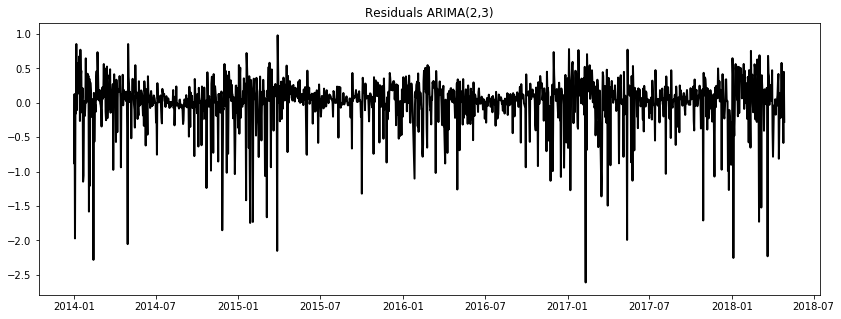

In [11]:
#plot Residuals from ARIMA(2,3)

fig, RentalPlot = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
legLine0 = mlines.Line2D([],[],color='b',markersize=15, label='Chaos 1') 
legLine1 = mlines.Line2D([],[],color='m',markersize=15, label='Chaos 2')

RentalPlot.set_title('Residuals ARIMA(2,3)')
RentalPlot.plot(pd.to_datetime(ARMA23_resids.index), ARMA23_resids,  color='k', linestyle='-', linewidth=2)

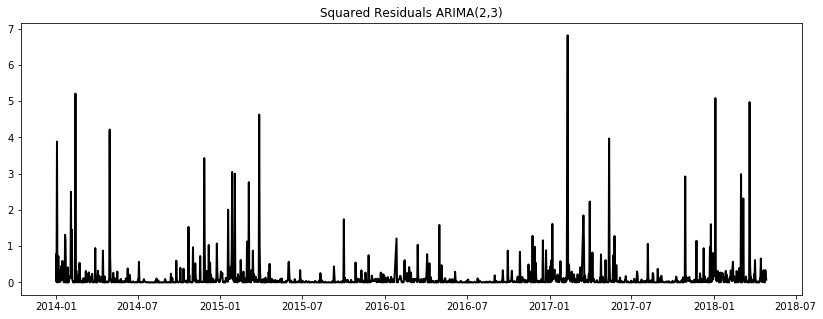

In [12]:
#plot Residuals from ARIMA(2,3)

fig, RupeePlot = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
legLine0 = mlines.Line2D([],[],color='b',markersize=15, label='Chaos 1') 
legLine1 = mlines.Line2D([],[],color='m',markersize=15, label='Chaos 2')

RupeePlot.set_title('Squared Residuals ARIMA(2,3)')
RupeePlot.plot(pd.to_datetime(residSquared.index), residSquared,  color='k', linestyle='-', linewidth=2)

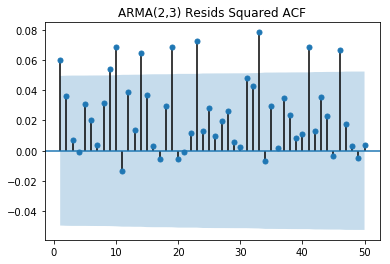

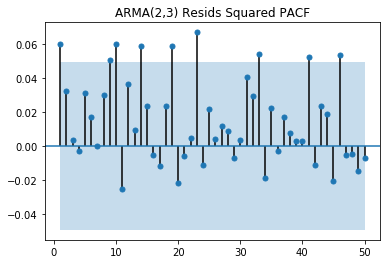

In [13]:
# ARMA(2,3) Resids Squared ACF, PACF
smg.tsaplots.plot_acf(residSquared, zero=False, lags=50)
plt.title('ARMA(2,3) Resids Squared ACF')
smg.tsaplots.plot_pacf(residSquared,zero=False, lags=50)
plt.title('ARMA(2,3) Resids Squared PACF')

### Fit ARCH Model

In [14]:
# use function below to calculate AICc for different combinations 

def calcARCH_AICc(observations):
    
    combos = list(range(15))[1:]
    result_li = []
    
    
    for ea in combos: 
        try:
            model = arch_model(observations, mean='Constant', p=2,o=0, q=3, power=2.0 )
            model.volatility = ARCH(p=ea)
            results = model.fit(update_freq=5, disp='off')
            logLikeli = results.loglikelihood
            n_obs = results.nobs
            #AICc calc
            AICc =  (-2*logLikeli) + 2*(ea + 1)*(n_obs/(n_obs-ea-2))
        except (ValueError, Exception, Warning): 
            AICc = 0
            pass

    
        result_li.append(['ARCH(%r)'%ea, AICc])
        
    res_DF = pd.DataFrame(result_li)
    res_DF.columns = ['ARCH(q)','AICc']
    # res_DF['Abs AICc'] = abs(res_DF['AICc'])
    res_DF.sort_values('AICc', ascending=True, inplace=True)
    
    return res_DF
        
    





In [15]:
amG = arch_model(ARMA23_resids, dist='t', mean='Constant', power=2.0 )
amG.volatility = ARCH(p=14)
resARCH = amG.fit(disp='off')
#resG = amG.fit(update_freq=5, disp='off')
resARCH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Constant Mean - ARCH Model Results                         
====================================================================================
Dep. Variable:                         None   R-squared:                      -0.013
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.013
Vol Model:                             ARCH   Log-Likelihood:               -104.595
Distribution:      Standardized Student's t   AIC:                           243.190
Method:                  Maximum Likelihood   BIC:                           334.290
                                              No. Observations:                 1570
Date:                      Tue, May 01 2018   Df Residuals:                     1553
Time:                              17:01:37   Df Model:                           17
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0546  5.297e-03     10.311  6.272e-25 [4.423e-02,6.499e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0318  9.093e-03      3.494  4.766e-04  [1.395e-02,4.959e-02]
alpha[1]       0.4050  8.313e-02      4.871  1.108e-06      [  0.242,  0.568]
alpha[2]       0.0731  2.820e-02      2.591  9.572e-03    [1.780e-02,  0.128]
alpha[3]       0.0110  1.077e-02      1.026      0.305 [-1.006e-02,3.215e-02]
alpha[4]       0.0266  2.514e-02      1.058      0.290 [-2.268e-02,7.588e-02]
alpha[5]       0.0426  2.764e-02      1.542      0.123 [-1.156e-02,9.679e-02]
alpha[6]       0.0428  2.927e-02      1.463      0.144   [-1.455e-02,  0.100]
alpha[7]   2.8537e-03  1.257e-02      0.227      0.820 [-2.179e-02,2.750e-02]
alpha[8]       0.0467  3.427e-02      1.362      0.173   [-2.049e-02,  0.114]
alpha[9]       0.1182  4.893e-02      2.417  1.566e-02    [2.234e-02,  0.214]
alpha[10]      0.0265  3.093e-02      0.857      0.392 [-3.412e-02,8.714e-02]
alpha[11]  7.4599e-03  1.655e-02      0.451      0.652 [-2.498e-02,3.990e-02]
alpha[12]      0.0744  3.739e-02      1.989  4.673e-02    [1.076e-03,  0.148]
alpha[13]      0.0000  5.147e-02      0.000      1.000      [ -0.101,  0.101]
alpha[14]      0.1228  6.870e-02      1.787  7.392e-02   [-1.188e-02,  0.257]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             2.5945  7.473e-02     34.721 3.838e-264 [  2.448,  2.741]
========================================================================

Covariance estimator: robust
"""

In [ ]:
archAICCs = calcARCH_AICc(ARMA23_resids)

In [ ]:
archAICCs

In [16]:
ARCH_resids = resARCH.resid

ljb_lags = list(range(10,81,10))
ARCH_ljb = sm.stats.diagnostic.acorr_ljungbox(ARCH_resids, lags=ljb_lags)
ArchLBJdf = pd.DataFrame(ARCH_ljb[1])
ArchLBJdf['Lag'] = ljb_lags
ArchLBJdf.columns = ['Lj-B Pvalue','Lag']
ArchLBJdf



,Lj-B Pvalue,Lag
0,0.996208,10
1,0.808888,20
2,0.876344,30
3,0.840439,40
4,0.732910,50
5,0.750490,60
6,0.843369,70
7,0.815573,80


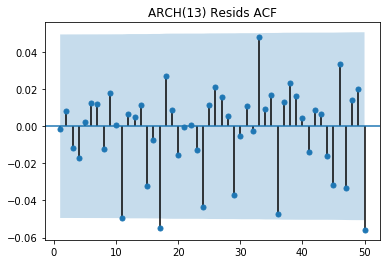

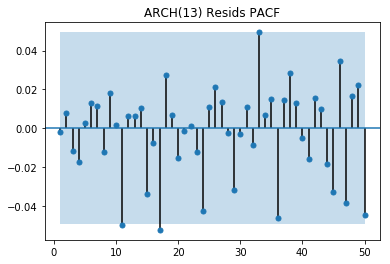

In [17]:
# ARCH(13) Residuals ACF, PACF
smg.tsaplots.plot_acf(ARCH_resids, zero=False, lags=50)
plt.title('ARCH(13) Resids ACF')
smg.tsaplots.plot_pacf(ARCH_resids,zero=False, lags=50)
plt.title('ARCH(13) Resids PACF')

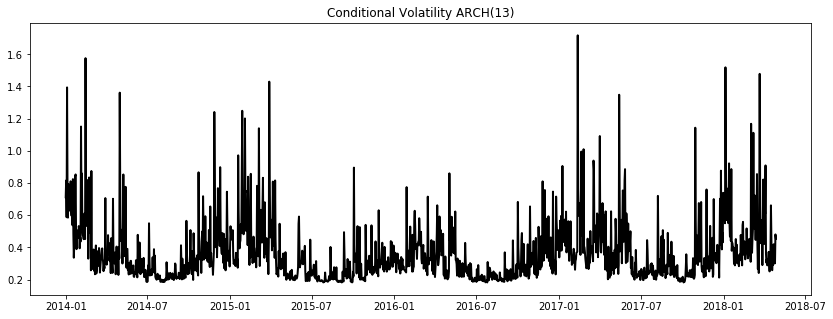

In [18]:
#plot Residuals from ARIMA(2,3)

fig, RupeePlot = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
legLine0 = mlines.Line2D([],[],color='b',markersize=15, label='Chaos 1') 
legLine1 = mlines.Line2D([],[],color='m',markersize=15, label='Chaos 2')

RupeePlot.set_title('Conditional Volatility ARCH(13)')
RupeePlot.plot(resARCH.conditional_volatility,  color='k', linestyle='-', linewidth=2)

In [ ]:
amG = arch_model(ARMA23_resids, mean='Constant', power=2.0 )
amG.volatility = GARCH(1,0,1)
#res = am.fit(update_freq=10, disp='off')
resG = amG.fit(update_freq=15, disp='off')
resG.summary()

In [ ]:
# hmmm garch(1,0,1) returns two significant coefficients but has a higher AICc than ARCH(13),
# which returns only one significant coefficient. what to do? 
(-2*resG.loglikelihood) + 2*(2 + 1)*(resG.nobs/(resG.nobs-2-2))

In [ ]:
GARCH_resids = resG.resid

ljb_lags = list(range(12,72,12))
GARCH_ljb = sm.stats.diagnostic.acorr_ljungbox(GARCH_resids, lags=ljb_lags)
GarchLBJdf = pd.DataFrame(GARCH_ljb[1])
GarchLBJdf['Lag'] = ljb_lags
GarchLBJdf.columns = ['Lj-B Pvalue','Lag']
GarchLBJdf

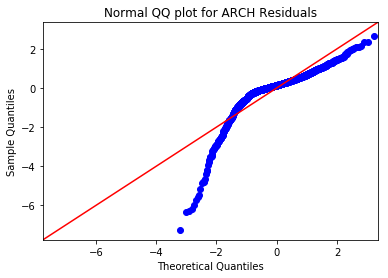

In [19]:
normalPlt = smg.gofplots.qqplot(ARCH_resids, line='45', fit=True)
plt.title('Normal QQ plot for ARCH Residuals')

### Forecast Plots

In [20]:
ARCH_ht = pd.DataFrame(resARCH.conditional_volatility)
ARCH_ht = ARCH_ht.merge(pd.DataFrame(rentalDeSea_ARMA23.fittedvalues), how='left', left_index=True, right_index=True)
ARCH_ht.columns = ['cond_vol', 'ARMAfits']
ARCH_ht['95FI'] = ARCH_ht.apply(lambda x: x['ARMAfits'] + 1.96*math.sqrt(x['cond_vol']), axis=1)
ARCH_ht['05FI'] = ARCH_ht.apply(lambda x: x['ARMAfits'] - 1.96*math.sqrt(x['cond_vol']), axis=1)
ARCH_ht[(ARCH_ht['ARMAfits'] > ARCH_ht['95FI']) | (ARCH_ht['ARMAfits'] < ARCH_ht['05FI'])]

,cond_vol,ARMAfits,95FI,05FI
Date,,,,


In [27]:
ARCH_ht

,cond_vol,ARMAfits,95FI,05FI
Date,,,,
2014-01-01,0.711675,9.717904,11.371376,8.064432
2014-01-02,0.815842,9.079950,10.850299,7.309600
2014-01-03,0.587432,9.228390,10.730615,7.726165
2014-01-04,1.394265,8.223640,10.537989,5.909291
2014-01-05,0.766690,8.504015,10.220207,6.787823
2014-01-06,0.585004,8.520621,10.019738,7.021504
2014-01-07,0.793541,9.009958,10.755944,7.263971
2014-01-08,0.674661,8.875318,10.485218,7.265418
2014-01-09,0.686141,9.072265,10.695804,7.448726


In [21]:
ArchFcast = resARCH.forecast(horizon=1)
HNplus1 = ArchFcast.variance.iloc[-1,:][0]

ARCH_CI95 = forecast_1step[0][0] + 1.96*math.sqrt(HNplus1)
ARCH_CI05 = forecast_1step[0][0] - 1.96*math.sqrt(HNplus1)

Actual 4/27 ridership: 39,929

In [46]:
#ACTUAL ridership logged and adjusted for seasonality 
actualADJ = math.log(39929) - DOWavg.iloc[5,0] - MOYavg.iloc[3,0] + 20
actualADJ

10.242780420997965

In [47]:
(forecast_1step[0][0] - actualADJ)/forecast_1step[0][0]

-0.013942362955169246

In [22]:
forecast_1step = rentalDeSea_ARMA23.forecast(steps=1)
print("ARIMA 1 Step Forecast: %r \nARIMA 1 Step CI: %r, %r" %(forecast_1step[0][0], forecast_1step[2][0][0], forecast_1step[2][0][1]))

ARIMA 1 Step Forecast: 10.101935568748736 
ARIMA 1 Step CI: 9.395003381124702, 10.80886775637277


In [23]:
forecast_1step = rentalDeSea_ARMA23.forecast(steps=1)
print("ARIMA 1 Step Forecast: %r \nARIMA-ARCH 1 Step CI: %r, %r" %(forecast_1step[0][0], ARCH_CI05, ARCH_CI95))

ARIMA 1 Step Forecast: 10.101935568748736 
ARIMA-ARCH 1 Step CI: 9.386862073588413, 10.81700906390906


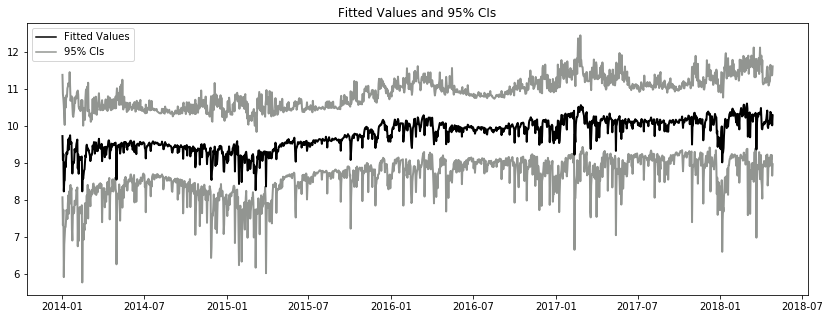

In [24]:
#plot forecast intervals 

fig, RupeePlot = plt.subplots(nrows=1, ncols=1, figsize=(14,5))
legLine0 = mlines.Line2D([],[],color='k',markersize=15, label='Fitted Values') 
legLine1 = mlines.Line2D([],[],color='xkcd:grey',markersize=15, label='95% CIs')

RupeePlot.set_title('Fitted Values and 95% CIs')
RupeePlot.plot(ARCH_ht['95FI'],  color='xkcd:grey', linestyle='-', linewidth=2)
RupeePlot.plot(ARCH_ht['05FI'],  color='xkcd:grey', linestyle='-', linewidth=2)
RupeePlot.plot(ARCH_ht['ARMAfits'],  color='k', linestyle='-', linewidth=2)

RupeePlot.legend(handles=[legLine0, legLine1])

### Forecast Plot attempt below

In [25]:
# create array with forecast values 
ARMA23_forecast = rentalDeSea_ARMA23.forecast(steps=30)
fcast_start = pd.to_datetime(rentalDat.index).max()
fcast_end = fcast_start + pd.Timedelta(value=29, unit='D')
fcast_time = pd.date_range(start=fcast_start, end=fcast_end)

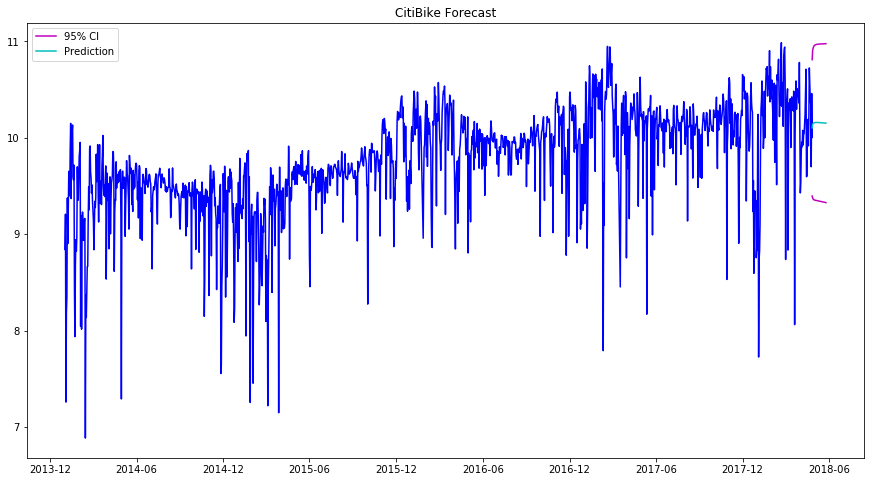

In [26]:
# single plot with 2 scales
legend_line = mlines.Line2D([],[],color='m',markersize=15, label='95% CI') 
legLine2 = mlines.Line2D([],[],color='c',markersize=15, label='Prediction')

fig, fcast_plot =  plt.subplots(figsize=(15,8))
fcast_plot.plot(pd.to_datetime(rentalDat['Date']), rentalDat['LogRental_desea'], 'b-')
#fcast_plot.plot(arma23_fcast[2][:,0],  color='r', linestyle='-', linewidth=2)
#fcast_plot.plot(arma23_fcast[2][:,1],  color='r', linestyle='-', linewidth=2)
fcast_plot.plot(fcast_time,ARMA23_forecast[0], 'c-')
fcast_plot.plot(fcast_time,ARMA23_forecast[2][:,0], 'm-')
fcast_plot.plot(fcast_time,ARMA23_forecast[2][:,1], 'm-')
#fcast_plot.set_xlabel('Week')
#fcast_plot.set_ylabel('Log Rentals', color='k')


fcast_plot.legend(handles=[legend_line, legLine2])
fcast_plot.set_title("CitiBike Forecast")